# EDA OF CANADA REFUGEES FROM 2012 TO 2022


## 
The 
analysis aims to uncover patterns, distributions, and relationships within the data, enabling 
a deeper understanding of refugee movements and aiding in informed decision-making 
processes

In [1]:
#importing librarieS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading my csv file into a datafram
df= pd.read_csv('can-stats-2012-22.csv')
df

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan AF),2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70
...,...,...,...,...,...
1865,2022,Venezuela (Bolivarian Republic of),1497,2104,3601
1866,2022,Western Sahara,5,0,5
1867,2022,Yemen,450,452,902
1868,2022,Zambia,23,25,48


In [6]:
df.shape
print(f'the shape of the dataset is {df.shape}')
print(f'the dataset has {df.shape[0]} rows and {df.shape[1]} colums')

the shape of the dataset is (1870, 5)
the dataset has 1870 rows and 5 colums


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [6]:
# descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1870.0,2016.955615,3.167123,2012.0,2014.00,2017.0,2020.00,2022.0
UNHCR-refugees,1870.0,752.438503,2427.738942,0.0,20.00,124.0,563.75,75098.0
Asylum-seekers,1870.0,323.139572,1181.143362,0.0,7.00,36.0,195.25,19765.0
total-count,1870.0,1075.578075,2980.751399,0.0,39.25,187.0,889.75,75294.0


### Observations

#### 
1. The dataset runs from 2012 t0 2022
2. The total number of refugees and asylum seekers ranged from 0 to 75294 with UNHCR-refugees standing maximally at 75098 while maximum number of asylum seekers stood at 19765.

In [7]:
df.corr(numeric_only = True)

,Year,UNHCR-refugees,Asylum-seekers,total-count
Year,1.000000,-0.024037,0.144239,0.037578
UNHCR-refugees,-0.024037,1.000000,0.278267,0.924737
Asylum-seekers,0.144239,0.278267,1.000000,0.622897
total-count,0.037578,0.924737,0.622897,1.000000


In [8]:
# checking for duplicates
df.duplicated().sum()

0

##### There are no duplicates in the data set

In [9]:
# confirming missing values
df.isnull().sum()

Year                 0
Country-of-origin    0
UNHCR-refugees       0
Asylum-seekers       0
total-count          0
dtype: int64

#### There are no missing values in the dataset

# Analysis Question

#### 1. From which countries has Canada admitted the highest number of refugees (limit 
to top 5)?

In [43]:
highest_refugees =df['UNHCR-refugees'].groupby(by=df['Country-of-origin']).sum().sort_values(ascending = False).reset_index()[0:5]
highest_refugees

,Country-of-origin,UNHCR-refugees
0,Colombia,108416
1,China,98586
2,Ukraine,88376
3,Pakistan,74737
4,Haiti,70956


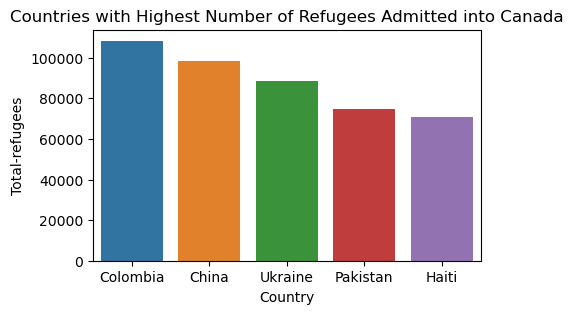

In [45]:
 #Visualizing using Seaborn
plt.figure(figsize =(5,3))
sns.barplot(x='Country-of-origin',y='UNHCR-refugees',data =highest_refugees)
plt.title('Countries with Highest Number of Refugees Admitted into Canada')
plt.xlabel('Country')
plt.ylabel('Total-refugees')
plt.show()

#### 2.2. What are the total number of resettled refugees in Canada per year?

In [28]:
Yearcount_refugees =df['UNHCR-refugees'].groupby(by=df['Year']).sum()
Yearcount_refugees

Year
2012    163751
2013    160347
2014    149164
2015    135890
2016     97322
2017    104768
2018    114101
2019    101757
2020    109214
2021    130125
2022    140621
Name: UNHCR-refugees, dtype: int64

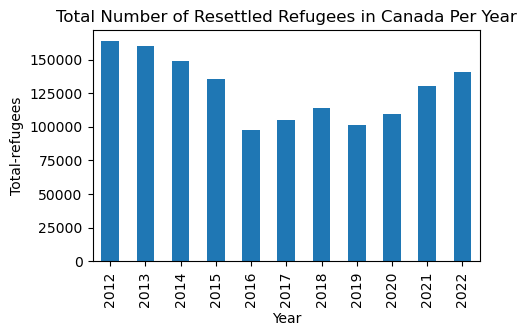

In [29]:
 #Visualizing using Pandas
plt.figure(figsize =(5,3))
Yearcount_refugees.plot(kind= 'bar')
plt.title('Total Number of Resettled Refugees in Canada Per Year')
plt.xlabel('Year')
plt.ylabel('Total-refugees')
plt.show()

In [21]:
df.head()

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan AF),2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70


#### 3. What are the countries of origin for the majority of asylum claims made in 
Canada? (limit to top 7)

In [30]:
highest_asylum =df['Asylum-seekers'].groupby(by=df['Country-of-origin']).sum().sort_values(ascending = False).reset_index()[0:7]
highest_asylum

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,45774
4,Haiti,40908
5,Colombia,30475
6,China,21526


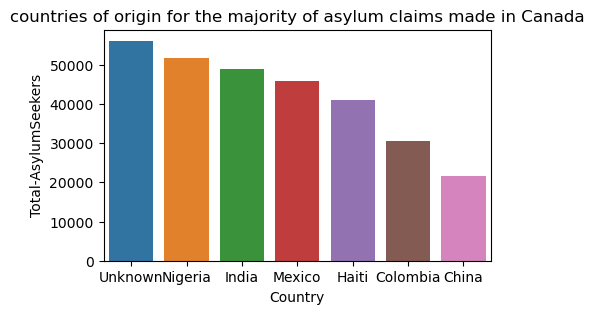

In [31]:
 #Visualizing using Seaborn
plt.figure(figsize =(5,3))
sns.barplot(x='Country-of-origin',y='Asylum-seekers',data =highest_asylum)
plt.title('countries of origin for the majority of asylum claims made in Canada')
plt.xlabel('Country')
plt.ylabel('Total-AsylumSeekers')
plt.show()

#### 4. What is the total number of asylum claims made in Canada every year?

In [32]:
Yearcount_asylum =df['Asylum-seekers'].groupby(by=df['Year']).sum()
Yearcount_asylum

Year
2012     32647
2013     22145
2014     16699
2015     19631
2016     23946
2017     51859
2018     78766
2019     97017
2020     85352
2021     63143
2022    113066
Name: Asylum-seekers, dtype: int64

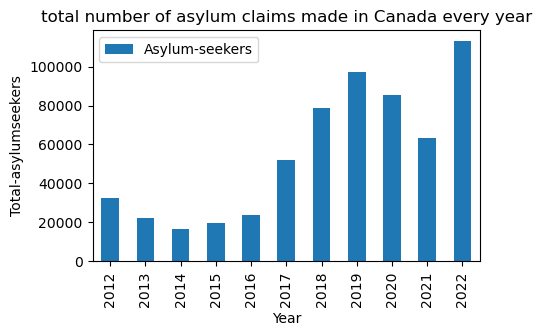

In [42]:
#Visualizing using Pandas
plt.figure(figsize =(5,3))
Yearcount_asylum.plot(kind= 'bar')
plt.legend()
plt.title('total number of asylum claims made in Canada every year')
plt.xlabel('Year')
plt.ylabel('Total-asylumseekers')
plt.show()

#### 5. What are the general trends in refugee and asylum statistics from 2012-2022?
(Hint: Unpivoting the refugee and asylum column so it becomes rows with each of 
their values beside as another column, you might need to use pd.melt)

In [37]:
# Unpivot the data using pd.melt
df_melted = pd.melt(df, id_vars=['Year'], value_vars=['UNHCR-refugees', 'Asylum-seekers'],
                    var_name='Category', value_name='Count')
df_melted

,Year,Category,Count
0,2012,UNHCR-refugees,2609
1,2012,UNHCR-refugees,1764
2,2012,UNHCR-refugees,513
3,2012,UNHCR-refugees,753
4,2012,UNHCR-refugees,40
...,...,...,...
3735,2022,Asylum-seekers,2104
3736,2022,Asylum-seekers,0
3737,2022,Asylum-seekers,452
3738,2022,Asylum-seekers,25


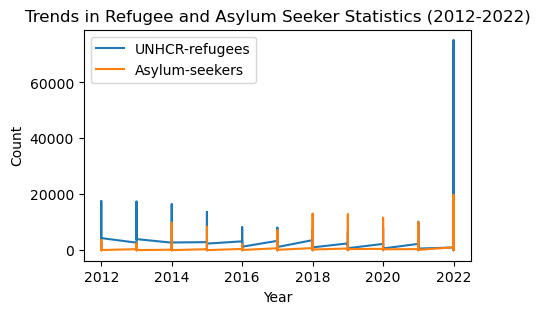

In [40]:
# Plotting the trends
plt.figure(figsize=(5, 3))
for category in df_melted['Category'].unique():
    subset = df_melted[df_melted['Category'] == category]
    plt.plot(subset['Year'], subset['Count'], label=category)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trends in Refugee and Asylum Seeker Statistics (2012-2022)')
plt.legend()
plt.grid(False)
plt.show()